##퍼셉트론

data_key : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
feature종류(=train의 feature순서)
 = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data의 처음 5개 표본값 
 = [[6.5 2.8 4.6 1.5]
 [6.7 2.5 5.8 1.8]
 [6.8 3.  5.5 2.1]
 [5.1 3.5 1.4 0.3]
 [6.  2.2 5.  1.5]]

각 feature의 평균 = [5.83035714 3.025      3.79464286 1.20803571]
각 feature의 표준편차 = [0.83343516 0.41758233 1.77214757 0.76940821]

예측값
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0]
정답
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0]
테스트 정확도 :1.00

테스트 샘플 feature = [[6 3 4 1]]
예측값 = [1]
예측한 품종 = ['versicolor']


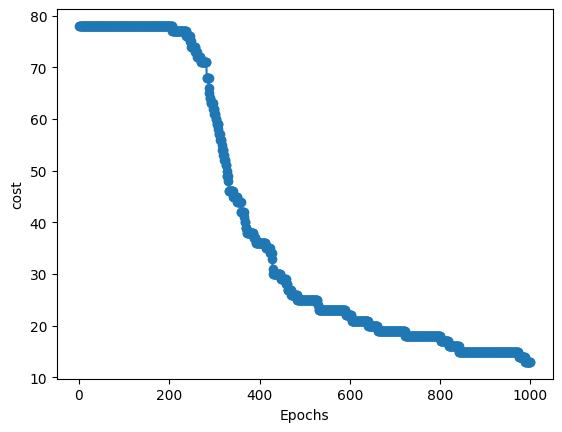

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier




class Perceptron(object):


#eta : float (학습률 -> float 형)
#n_iter : int (epoch = 인공 신경망에서 전체 data set 에대해 forwardpass/backwardpass 과정을 거친것
#                    = 전체 data set에 대해 한 버 학습을 완료한상태-> int 형 )
#                    예 : epoch = 10 -> 전체 data를 10번사용해서 학습)
#random_state : int (난수 생성기 <- 여기서는 가중치를 무작위로 초기화하기위해 사용)
#w_ : 1d-array (학습된 가중치 벡터)
#errors_ : list (누적된 오류들을 벡터로 저장한 값)
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

#X : {array-like}, shape = [n_samples, n_features] -> {}안에 data, n_samples개 샘플과 n_features개의 특성, 훈련데이터
#y : array-like, shape = [n_samples] -> {}안에 data, n_samples개의 정답 타깃
#fit함수에서는 self.w_로 표시된 가중치가 벡터 R^(m+1)로 초기화, 여기서 m=data_Set의 차원 <- m+1 이 되는 이유는 절편을 만들기 위해
#가중치를 0으로 초기화하지 않는 이유 -> if 초기 가중치 = 0이면 벡터의 방향은 바뀌지 않고 크기만 변화하기 때문 -> 초기가중치 != 0 인게 good
#.normal <- 정규 분호 확률밀도 함수를 만들기 위해 사용 -> loc = 평균값, scale = 표준편차, size= 생성 data수)

                                #
  def fit(self,X,y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1]) # 평균 =0, 표준편차 = 0.01인 정규분포에서 뽑은 랜덤수 <- 가중치 초기화에 사용
    self.errors_ = []                                                     # ㄴ> 학습이 시작되면모든 가중치를 random한 작은값으로 초기화
    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X,y): #zip()는 나열된 리스트에서 각각 원소를 하나씩 꺼내 반환
        update = self.eta*(target- self.predict(xi))
        self.w_[1:] += update*xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self


  def net_input(self, X):                #퍼셉트론의 계산을 의미 -> X와w를내적하고 편향값을더해준다
    return np.dot(X,self.w_[1:]) + self.w_[0]
# np.where -> 배열 내에서 특정 조건을 만족하는 우너소의 index를 찾아낸다.
  def predict(self, X):
    return  np.where(self.net_input(X) <=-100, 0,np.where(self.net_input(X) >  100, 2, 1))

iris_data = load_iris()
print("data_key : {}".format(iris_data.keys())) #load한 data들의 key 확인
train_input, test_input, train_target, test_target = train_test_split(iris_data['data'] ,iris_data['target'], random_state=1) #test_set과 train_set 생성
print("feature종류(=train의 feature순서)\n = {}".format(iris_data['feature_names']))
data_mean = np.mean(train_input, axis = 0)
data_std = np.std(train_input, axis =0)
print("data의 처음 5개 표본값 \n = {}".format(train_input[:5])) #통계값이 잘 맞는지 check 눈대중
print("\n각 feature의 평균 = {}".format(data_mean))
print("각 feature의 표준편차 = {}".format(data_std))
train_scaled = (train_input - data_mean)/data_std #표준점수 계산



ppn = Perceptron(eta=0.001, n_iter=1000,random_state=1)
ppn.fit(train_scaled, train_target) #표준점수를 통해 train
test_scaled = (test_input - data_mean)/data_std
test_pred = ppn.predict(test_scaled)

print("\n예측값")
print(test_pred)
print("정답")
print(test_target)
print("테스트 정확도 :{:.2f}".format(np.mean(test_pred == test_target)))



new_input = np.array([[6, 3,4 ,1]]) #새로운 saple을 어떻게 판단할지 check
new_input_scaled = (new_input - data_mean)/data_std
new_predict = ppn.predict(new_input_scaled)

print("\n테스트 샘플 feature = {}".format(new_input))
print("예측값 = {}".format(new_predict))
print("예측한 품종 = {}".format(iris_data['target_names'][new_predict]))


plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.show()

##아달린

data_key : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
feature종류(=train의 feature순서)
 = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data의 처음 5개 표본값 
 = [[6.5 2.8 4.6 1.5]
 [6.7 2.5 5.8 1.8]
 [6.8 3.  5.5 2.1]
 [5.1 3.5 1.4 0.3]
 [6.  2.2 5.  1.5]]

각 feature의 평균 = [5.83035714 3.025      3.79464286 1.20803571]
각 feature의 표준편차 = [0.83343516 0.41758233 1.77214757 0.76940821]


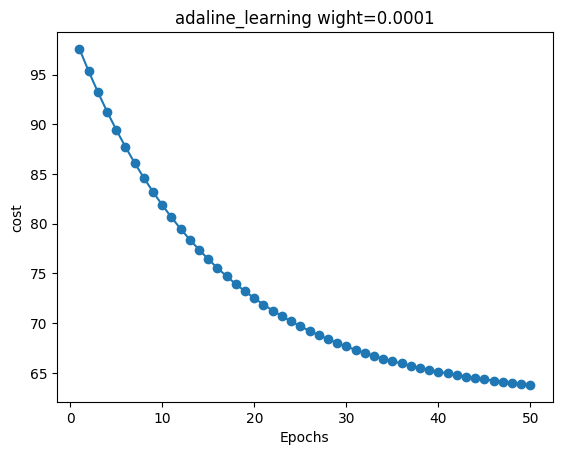

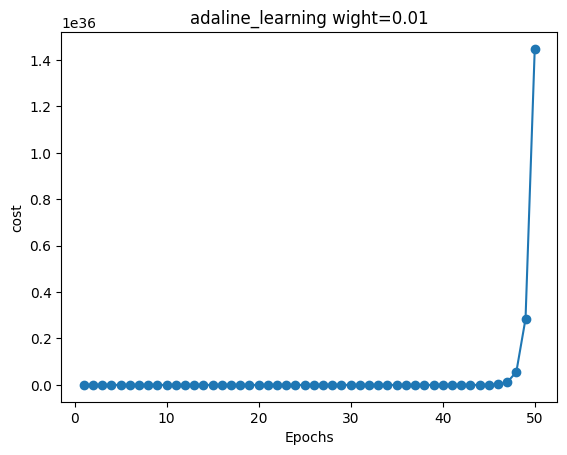

[97.5729449993075, 239.45530231644815, 963.885655499324, 4651.138226047495, 23410.91832731393, 118850.46061307451, 604391.2312667326, 3074537.225659403, 15641186.158313107, 79572898.2347284, 404819813.3595697, 2059484647.5408368, 10477445236.94155, 53303073134.74282, 271174656799.36966, 1379577015354.4622, 7018475708731.566, 35705872689391.625, 181650460502710.8, 924130606971179.5, 4701432500515800.0, 2.3918120869679744e+16, 1.2168131859254635e+17, 6.19042916251432e+17, 3.149325932637872e+18, 1.6021916364126497e+19, 8.151007849608359e+19, 4.146752951047457e+20, 2.1096237857073096e+21, 1.0732523904270342e+22, 5.46007634802595e+22, 2.7777654158692658e+23, 1.413163518929367e+24, 7.189344067083091e+24, 3.6575150308197457e+25, 1.8607283329117328e+26, 9.46629036306238e+26, 4.815891264340659e+27, 2.4500419679129422e+28, 1.2464371214071718e+29, 6.341138306888799e+29, 3.225997873177686e+30, 1.641197806148004e+31, 8.349448278624647e+31, 4.247707759313277e+32, 2.1609836490300818e+33, 1.0993812653

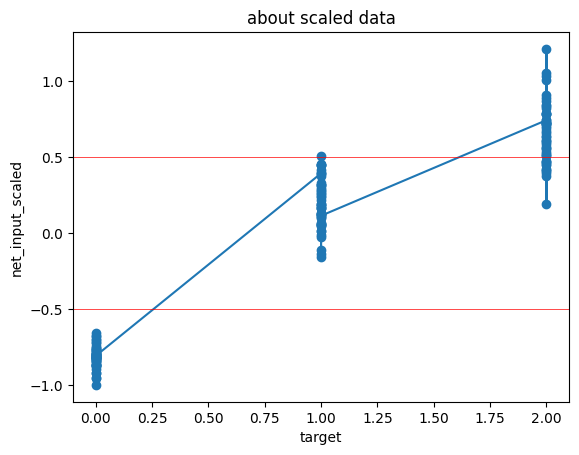

Text(0, 0.5, 'net_input')

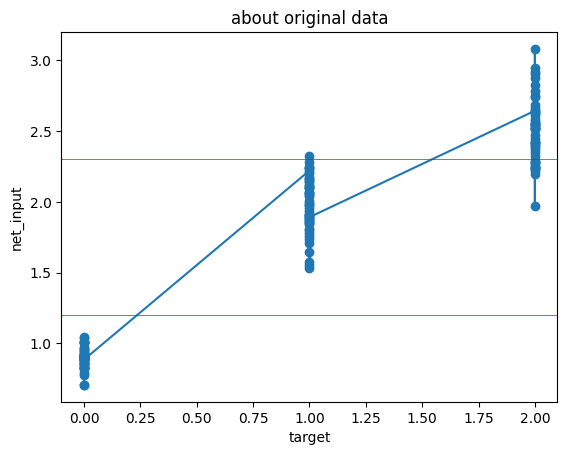

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split



class adaline(object):


#eta : float (학습률 -> float 형)
#n_iter : int (epoch = 인공 신경망에서 전체 data set 에대해 forwardpass/backwardpass 과정을 거친것
#                    = 전체 data set에 대해 한 버 학습을 완료한상태-> int 형 )
#                    예 : epoch = 10 -> 전체 data를 10번사용해서 학습)
#random_state : int (난수 생성기 <- 여기서는 가중치를 무작위로 초기화하기위해 사용)
#w_ : 1d-array (학습된 가중치 벡터)
#errors_ : list (누적된 오류들을 벡터로 저장한 값)
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

#X : {array-like}, shape = [n_samples, n_features] -> {}안에 data, n_samples개 샘플과 n_features개의 특성, 훈련데이터
#y : array-like, shape = [n_samples] -> {}안에 data, n_samples개의 정답 타깃
#fit함수에서는 self.w_로 표시된 가중치가 벡터 R^(m+1)로 초기화, 여기서 m=data_Set의 차원 <- m+1 이 되는 이유는 절편을 만들기 위해
#가중치를 0으로 초기화하지 않는 이유 -> if 초기 가중치 = 0이면 벡터의 방향은 바뀌지 않고 크기만 변화하기 때문 -> 초기가중치 != 0 인게 good
#.normal <- 정규 분호 확률밀도 함수를 만들기 위해 사용 -> loc = 평균값, scale = 표준편차, size= 생성 data수)

                                #
  def fit(self, X,y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale = 0.01, size =1+X.shape[1]) #학습된 가중치 행렬
    self.cost_ = []              #누적된 classification error
    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = y - output
      self.w_[1:] += self.eta*np.dot(X.T,errors)
      cost = sum((errors**2))/2.0
      self.cost_.append(cost)
    return self


  def net_input(self, X):                # X와w를내적하고 편향값을더해준다
    return np.dot(X,self.w_[1:]) + self.w_[0]
# np.where -> 배열 내에서 특정 조건을 만족하는 원소의 index를 찾아낸다.

  def activation(self,X):
    return X

"""
  def predict(self, X):
    return  np.where(self.net_input(X) <=-0.5, 0,np.where(self.net_input(X) > 0.5, 2, 1))
"""

iris_data = load_iris()
print("data_key : {}".format(iris_data.keys())) #load한 data들의 key 확인
print("feature종류(=train의 feature순서)\n = {}".format(iris_data['feature_names']))
train_input, test_input, train_target, test_target = train_test_split(iris_data['data'] ,iris_data['target'], random_state=1) #test_set과 train_set 생성



data_mean = np.mean(train_input, axis = 0)
data_std = np.std(train_input, axis =0)
print("data의 처음 5개 표본값 \n = {}".format(train_input[:5])) #통계값이 잘 맞는지 check 눈대중
print("\n각 feature의 평균 = {}".format(data_mean))
print("각 feature의 표준편차 = {}".format(data_std))
train_scaled = (train_input - data_mean)/data_std #표준점수 계산



ad1 = adaline(eta=0.0001, n_iter=50,random_state=1)
ad1.fit(train_scaled, train_target) #표준점수를 통해 train
test_scaled = (test_input - data_mean)/data_std #표준화된 정답 생성
"""
test_pred1 = ad1.predict(test_scaled)
"""
plt.plot(range(1,len(ad1.cost_)+1),ad1.cost_,marker='o')
plt.title("adaline_learning wight=0.0001")
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.show()



ad2 = adaline(eta=0.01, n_iter=50,random_state=1)
ad2.fit(train_scaled, train_target) #표준점수를 통해 train
test_scaled = (test_input - data_mean)/data_std
"""
test_pred2 = ad2.predict(test_scaled)
"""
plt.plot(range(1,len(ad2.cost_)+1),ad2.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.title("adaline_learning wight=0.01")
plt.show()
print(ad2.cost_)


"""
print("\n예측값1(learningweight=0.0001)")
print(test_pred1)
print("정답")
print(test_target)
print("테스트 정확도 :{:.2f}".format(np.mean(test_pred1 == test_target)))

print("\n예측값2(learningweight=0.01)")
print(test_pred2)
print("정답")
print(test_target)
print("테스트 정확도 :{:.2f}".format(np.mean(test_pred2 == test_target)))

new_input = np.array([[6, 3,4 ,1]]) #새로운 saple을 어떻게 판단할지 check
new_input_scaled = (new_input - data_mean)/data_std
new_predict = ad1.predict(new_input_scaled)

print("\n테스트 샘플 feature = {}".format(new_input))
print("예측값 = {}".format(new_predict))
print("예측한 품종 = {}".format(iris_data['target_names'][new_predict]))
"""

#적절한 경계 추측
print( "\n[virginica] = [2]")
print( "[versicolor] = [1]")
print( "[setosa] = 0")
check_scaled = (iris_data['data'] - np.mean(iris_data['data'],axis =0))/(np.std(iris_data['data'],axis=0))
plt.plot(iris_data['target'],ad1.net_input(check_scaled),marker='o')
plt.title("about scaled data")
plt.xlabel('target')
plt.ylabel('net_input_scaled')
plt.axhline(y=0.5,color='r',linewidth=0.5)
plt.axhline(y=-0.5,color='r',linewidth=0.5)
plt.show()
plt.plot(iris_data['target'],ad1.net_input(iris_data['data']),marker='o')
plt.axhline(y=2.3,color='r',linewidth=0.5)
plt.axhline(y=1.2,color='r',linewidth=0.5)
plt.title("about original data")
plt.xlabel('target')
plt.ylabel('net_input')

data_key : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
feature종류(=train의 feature순서)
 = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data의 처음 5개 표본값 
 = [[6.5 2.8 4.6 1.5]
 [6.7 2.5 5.8 1.8]
 [6.8 3.  5.5 2.1]
 [5.1 3.5 1.4 0.3]
 [6.  2.2 5.  1.5]]

각 feature의 평균 = [5.83035714 3.025      3.79464286 1.20803571]
각 feature의 표준편차 = [0.83343516 0.41758233 1.77214757 0.76940821]


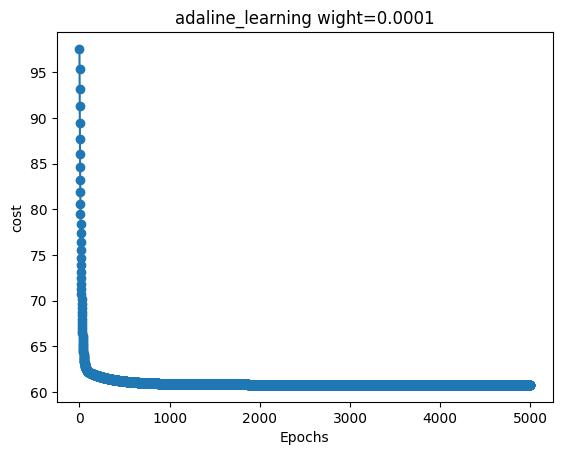

<ipython-input-5-dfaca3fcef4c>:40: RuntimeWarning: overflow encountered in double_scalars
  cost = sum((errors**2))/2.0
<ipython-input-5-dfaca3fcef4c>:40: RuntimeWarning: overflow encountered in square
  cost = sum((errors**2))/2.0


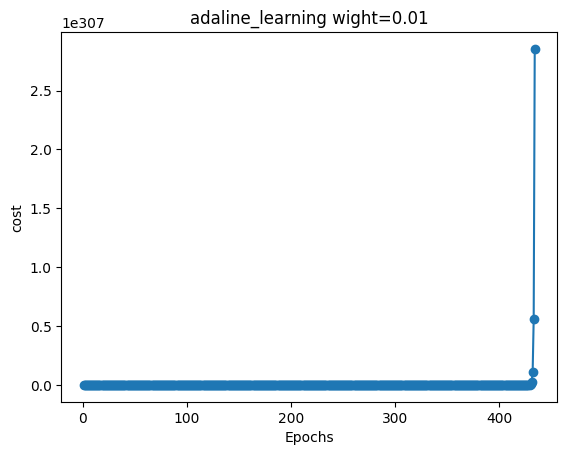

[97.5729449993075, 239.45530231644815, 963.885655499324, 4651.138226047495, 23410.91832731393, 118850.46061307451, 604391.2312667326, 3074537.225659403, 15641186.158313107, 79572898.2347284, 404819813.3595697, 2059484647.5408368, 10477445236.94155, 53303073134.74282, 271174656799.36966, 1379577015354.4622, 7018475708731.566, 35705872689391.625, 181650460502710.8, 924130606971179.5, 4701432500515800.0, 2.3918120869679744e+16, 1.2168131859254635e+17, 6.19042916251432e+17, 3.149325932637872e+18, 1.6021916364126497e+19, 8.151007849608359e+19, 4.146752951047457e+20, 2.1096237857073096e+21, 1.0732523904270342e+22, 5.46007634802595e+22, 2.7777654158692658e+23, 1.413163518929367e+24, 7.189344067083091e+24, 3.6575150308197457e+25, 1.8607283329117328e+26, 9.46629036306238e+26, 4.815891264340659e+27, 2.4500419679129422e+28, 1.2464371214071718e+29, 6.341138306888799e+29, 3.225997873177686e+30, 1.641197806148004e+31, 8.349448278624647e+31, 4.247707759313277e+32, 2.1609836490300818e+33, 1.0993812653

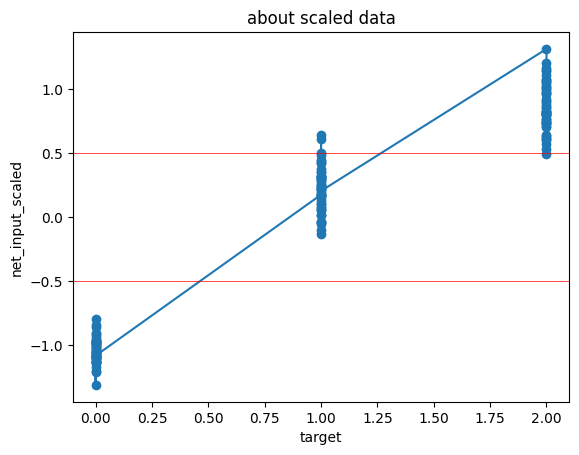

Text(0, 0.5, 'net_input')

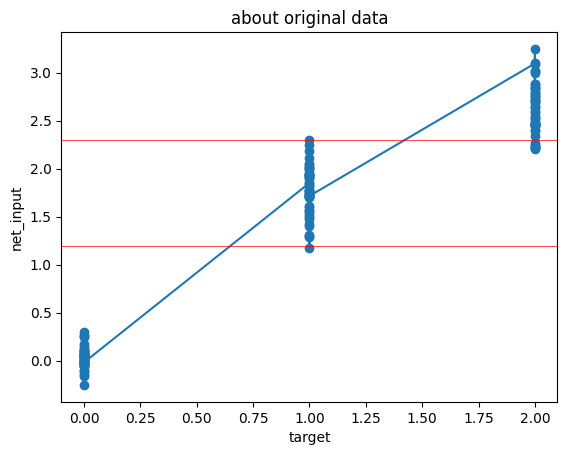

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split



class adaline(object):


#eta : float (학습률 -> float 형)
#n_iter : int (epoch = 인공 신경망에서 전체 data set 에대해 forwardpass/backwardpass 과정을 거친것
#                    = 전체 data set에 대해 한 버 학습을 완료한상태-> int 형 )
#                    예 : epoch = 10 -> 전체 data를 10번사용해서 학습)
#random_state : int (난수 생성기 <- 여기서는 가중치를 무작위로 초기화하기위해 사용)
#w_ : 1d-array (학습된 가중치 벡터)
#errors_ : list (누적된 오류들을 벡터로 저장한 값)
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

#X : {array-like}, shape = [n_samples, n_features] -> {}안에 data, n_samples개 샘플과 n_features개의 특성, 훈련데이터
#y : array-like, shape = [n_samples] -> {}안에 data, n_samples개의 정답 타깃
#fit함수에서는 self.w_로 표시된 가중치가 벡터 R^(m+1)로 초기화, 여기서 m=data_Set의 차원 <- m+1 이 되는 이유는 절편을 만들기 위해
#가중치를 0으로 초기화하지 않는 이유 -> if 초기 가중치 = 0이면 벡터의 방향은 바뀌지 않고 크기만 변화하기 때문 -> 초기가중치 != 0 인게 good
#.normal <- 정규 분호 확률밀도 함수를 만들기 위해 사용 -> loc = 평균값, scale = 표준편차, size= 생성 data수)

                                #
  def fit(self, X,y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale = 0.01, size =1+X.shape[1]) #학습된 가중치 행렬
    self.cost_ = []              #누적된 classification error
    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = y - output
      self.w_[1:] += self.eta*np.dot(X.T,errors)
      cost = sum((errors**2))/2.0
      self.cost_.append(cost)
    return self


  def net_input(self, X):                # X와w를내적하고 편향값을더해준다
    return np.dot(X,self.w_[1:]) + self.w_[0]
# np.where -> 배열 내에서 특정 조건을 만족하는 원소의 index를 찾아낸다.

  def activation(self,X):
    return X


  def predict(self, X):
    return  np.where(self.net_input(X) <=-100, 0,np.where(self.net_input(X) > 100, 2, 1))


iris_data = load_iris()
print("data_key : {}".format(iris_data.keys())) #load한 data들의 key 확인
print("feature종류(=train의 feature순서)\n = {}".format(iris_data['feature_names']))
train_input, test_input, train_target, test_target = train_test_split(iris_data['data'] ,iris_data['target'], random_state=1) #test_set과 train_set 생성



data_mean = np.mean(train_input, axis = 0)
data_std = np.std(train_input, axis =0)
print("data의 처음 5개 표본값 \n = {}".format(train_input[:5])) #통계값이 잘 맞는지 check 눈대중
print("\n각 feature의 평균 = {}".format(data_mean))
print("각 feature의 표준편차 = {}".format(data_std))
train_scaled = (train_input - data_mean)/data_std #표준점수 계산



ad1 = adaline(eta=0.0001, n_iter=5000,random_state=1)
ad1.fit(train_scaled, train_target) #표준점수를 통해 train
test_scaled = (test_input - data_mean)/data_std #표준화된 정답 생성
test_pred1 = ad1.predict(test_scaled)
plt.plot(range(1,len(ad1.cost_)+1),ad1.cost_,marker='o')
plt.title("adaline_learning wight=0.0001")
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.show()



ad2 = adaline(eta=0.01, n_iter=5000,random_state=1)
ad2.fit(train_scaled, train_target) #표준점수를 통해 train
test_scaled = (test_input - data_mean)/data_std
test_pred2 = ad2.predict(test_scaled)
plt.plot(range(1,len(ad2.cost_)+1),ad2.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.title("adaline_learning wight=0.01")
plt.show()
print(ad2.cost_)



print("\n예측값1(learningweight=0.0001)")
print(test_pred1)
print("정답")
print(test_target)
print("테스트 정확도 :{:.2f}".format(np.mean(test_pred1 == test_target)))

print("\n예측값2(learningweight=0.01)")
print(test_pred2)
print("정답")
print(test_target)
print("테스트 정확도 :{:.2f}".format(np.mean(test_pred2 == test_target)))

new_input = np.array([[6, 3,4 ,1]]) #새로운 saple을 어떻게 판단할지 check
new_input_scaled = (new_input - data_mean)/data_std
new_predict = ad1.predict(new_input_scaled)

print("\n테스트 샘플 feature = {}".format(new_input))
print("예측값 = {}".format(new_predict))
print("예측한 품종 = {}".format(iris_data['target_names'][new_predict]))


#적절한 경계 추측
print( "\n[virginica] = [2]")
print( "[versicolor] = [1]")
print( "[setosa] = 0")
check_scaled = (iris_data['data'] - np.mean(iris_data['data'],axis =0))/(np.std(iris_data['data'],axis=0))
plt.plot(iris_data['target'],ad1.net_input(check_scaled),marker='o')
plt.title("about scaled data")
plt.xlabel('target')
plt.ylabel('net_input_scaled')
plt.axhline(y=0.5,color='r',linewidth=0.5)
plt.axhline(y=-0.5,color='r',linewidth=0.5)
plt.show()
plt.plot(iris_data['target'],ad1.net_input(iris_data['data']),marker='o')
plt.axhline(y=2.3,color='r',linewidth=0.5)
plt.axhline(y=1.2,color='r',linewidth=0.5)
plt.title("about original data")
plt.xlabel('target')
plt.ylabel('net_input')

##로지스틱 회귀

data_key : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
feature종류(=train의 feature순서)
 = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data의 처음 5개 표본값 
 = [[6.5 2.8 4.6 1.5]
 [6.7 2.5 5.8 1.8]
 [6.8 3.  5.5 2.1]
 [5.1 3.5 1.4 0.3]
 [6.  2.2 5.  1.5]]

각 feature의 평균 = [5.83035714 3.025      3.79464286 1.20803571]
각 feature의 표준편차 = [0.83343516 0.41758233 1.77214757 0.76940821]

 epoch에 따른 cost값 = 
[77.10053853448963, 74.85777622190673, 72.6512641829732, 70.48039811470846, 68.34456610104164, 66.2431501074058, 64.17552741416888, 62.14107198503576, 60.13915576738259, 58.16914992227083, 56.230425982624716, 54.32235693873883, 52.444318250908374, 50.59568878953945, 48.775851703602285, 46.9841952187344, 45.22011336668581, 43.48300664812615, 41.77228263110719, 40.087356487695445, 38.42765147146397, 36.792599338662455, 35.18164071597415, 33.594225417822585, 32.02981271621262, 30.48787156608381, 28.9

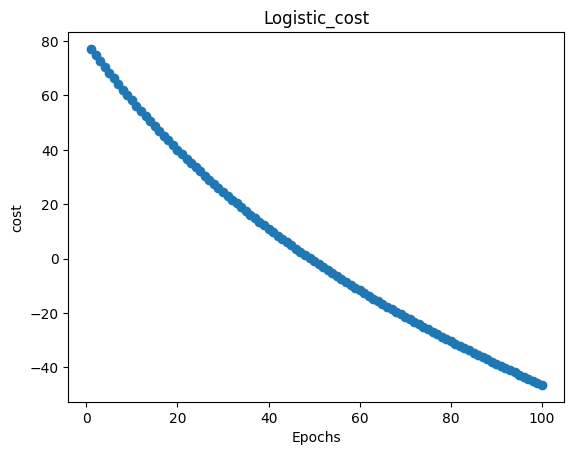


예측값(learningweight=0.0001)
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 1 1 2 1 1 1 0 1
 0]
정답
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0]
테스트 정확도 :0.92

테스트 샘플 feature = [[6 3 4 1]]
예측값 = [1]
예측한 품종 = ['versicolor']

[virginica] = [2]
[versicolor] = [1]
[setosa] = 0


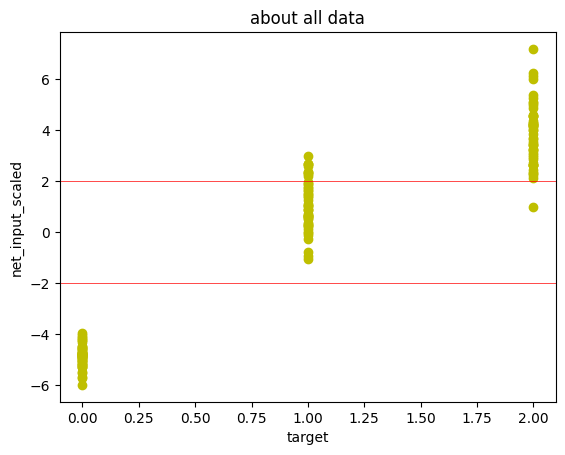

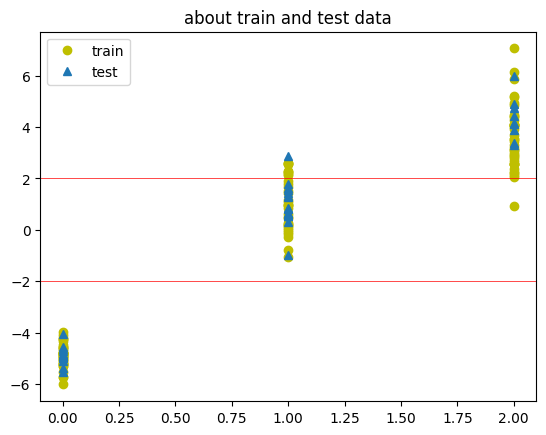

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


class LogisticRegression_down(object):

  def __init__(self, eta=0.05, n_iter =100, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X,y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale = 0.01, size =1+X.shape[1]) #학습된 가중치 행렬
    self.cost_ = []              #누적된 classification error
    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = y - output
      self.w_[1:] += self.eta*np.dot(X.T,errors)
      cost = np.sum(-y*np.log(output)-(1-y)*np.log(1-output))
      self.cost_.append(cost)
    return self

  def net_input(self, X):                # X와w를내적하고 편향값을더해준다
    return np.dot(X,self.w_[1:]) + self.w_[0]

  def activation(self,Z):
    return 1./(1.+np.exp(-Z))  #sigmoid function을 activation function으로 사용

  def predict(self, X):
    return  np.where((self.net_input(X)>= down_line) & (self.net_input(X)<= up_line),1,0)

class LogisticRegression_up(object):

  def __init__(self, eta=0.05, n_iter =100, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X,y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale = 0.01, size =1+X.shape[1]) #학습된 가중치 행렬
    self.cost_ = []              #누적된 classification error
    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = y - output
      self.w_[1:] += self.eta*np.dot(X.T,errors)
      cost = np.sum(-y*np.log(output)-(1-y)*np.log(1-output))
      self.cost_.append(cost)
    return self

  def net_input(self, X):                # X와w를내적하고 편향값을더해준다
    return np.dot(X,self.w_[1:]) + self.w_[0]

  def activation(self,Z):
    return 1./(1.+np.exp(-Z))  #sigmoid function을 activation function으로 사용

  def predict(self, X):
    return  np.where(self.net_input(X) >= up_line,2,0)

up_line =2.
down_line = -2.


iris_data = load_iris()
print("data_key : {}".format(iris_data.keys())) #load한 data들의 key 확인
print("feature종류(=train의 feature순서)\n = {}".format(iris_data['feature_names']))
train_input, test_input, train_target, test_target = train_test_split(iris_data['data'] ,iris_data['target'], random_state=1) #test_set과 train_set 생성



data_mean = np.mean(train_input, axis = 0)
data_std = np.std(train_input, axis =0)
print("data의 처음 5개 표본값 \n = {}".format(train_input[:5])) #통계값이 잘 맞는지 check 눈대중
print("\n각 feature의 평균 = {}".format(data_mean))
print("각 feature의 표준편차 = {}".format(data_std))
train_scaled = (train_input - data_mean)/data_std #표준점수 계산



lr_up = LogisticRegression_up(eta=0.0001, n_iter=100,random_state=1)
lr_up.fit(train_scaled, train_target) #표준점수를 통해 train
test_scaled = (test_input - data_mean)/data_std #표준화된 정답 생성
test_pred_up = lr_up.predict(test_scaled)

lr_down = LogisticRegression_down(eta=0.0001, n_iter=100,random_state=1)
lr_down.fit(train_scaled, train_target) #표준점수를 통해 train
test_pred_down = lr_down.predict(test_scaled)

test_pred = test_pred_up+test_pred_down
plt.plot(range(1,len(lr_up.cost_)+1),lr_up.cost_,marker='o')
print("\n epoch에 따른 cost값 = \n{}".format(lr_up.cost_))
plt.title("Logistic_cost")
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.show()



print("\n예측값(learningweight=0.0001)")
print(test_pred)
print("정답")
print(test_target)
print("테스트 정확도 :{:.2f}".format(np.mean(test_pred == test_target)))


new_input = np.array([[6, 3,4 ,1]]) #새로운 saple을 어떻게 판단할지 check
new_input_scaled = (new_input - data_mean)/data_std
new_predict_up = lr_up.predict(new_input_scaled)
new_predict_down = lr_down.predict(new_input_scaled)
new_predict = new_predict_up + new_predict_down
print("\n테스트 샘플 feature = {}".format(new_input))
print("예측값 = {}".format(new_predict))
print("예측한 품종 = {}".format(iris_data['target_names'][new_predict]))


#적절한 경계 추측
print( "\n[virginica] = [2]")
print( "[versicolor] = [1]")
print( "[setosa] = 0")
check_scaled = (iris_data['data'] - np.mean(iris_data['data'],axis =0))/(np.std(iris_data['data'],axis=0))
plt.plot(iris_data['target'],lr_up.net_input(check_scaled)+lr_down.net_input(check_scaled),'yo')
plt.title("about all data")
plt.xlabel('target')
plt.ylabel('net_input_scaled')
plt.axhline(y=up_line,color='r',linewidth=0.5)
plt.axhline(y=down_line,color='r',linewidth=0.5)
plt.show()
plt.plot(train_target,lr_up.net_input(train_scaled)+lr_down.net_input(train_scaled),'yo',label = 'train')
plt.plot(test_target,lr_down.net_input(test_scaled)+lr_up.net_input(test_scaled),'^',label = 'test')
plt.title("about train and test data")
plt.axhline(y=up_line,color='r',linewidth=0.5)
plt.axhline(y=down_line,color='r',linewidth=0.5)
plt.legend()
plt.show()


<ipython-input-3-9feeb52e9d69>:58: UserWarning: The following kwargs were not used by contour: 'level', 'linestyle'
  plt.contour(xx, yy, Z, level=[0], linestyle=['-'])


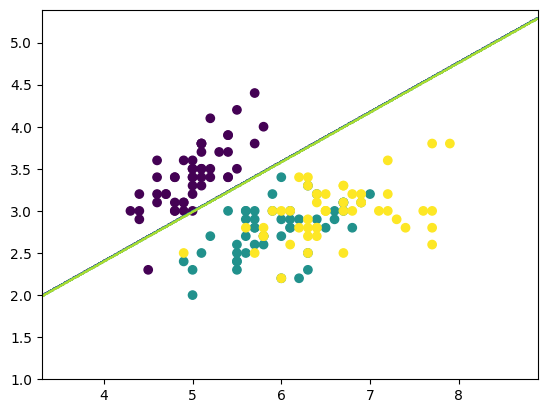

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X = iris.data[:, :]
y = iris.target

class adaline(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
      self.eta = eta
      self.n_iter = n_iter
      self.random_state = random_state

    def fit(self, X, y):
      rgen = np.random.RandomState(self.random_state)
      self.w_ = rgen.normal(loc=0.0, scale = 0.01, size = 1+X.shape[1])
      self.cost_ = []
      for _ in range(self.n_iter):
        net_input = self.net_input(X)
        output = self.activation(net_input)
        errors = y - output
        self.w_[1:] += self.eta*X.T.dot(errors)
        cost = (errors**2).sum()/2.0
        self.cost_.append(cost)
      return self

    def net_input(self, X):
      return np.dot(X,self.w_[1:]) + self.w_[0]

    def activation(self, X):
      # return X
      return 1/(1+np.exp(-X))

    def predict(self, X):
      return np.where(self.net_input(X) <=0, -1, 1)

adn = adaline(eta=0.001, n_iter=20)
adn.fit(X[:100,[0,1]], y[:100])

# 에포크에 따른 에러를 그래프로 표시
# plt.plot(list(range(1, len(adn.cost_) + 1)), adn.cost_, marker='o')
# plt.xlabel('에포크')
# plt.ylabel('에러 횟수')

plt.scatter(X[:, 0], X[:, 1], c= y[:])

h=0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = adn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, level=[0], linestyle=['-'])
plt.show()

# t = np.linspace(X[:100, 0].min(), X[:100, 0].max(), 1000)

# print(ppn.weights)

# plt.plot(t, (ppn.weights[1] * t - ppn.weights[0]) / ppn.weights[2], label=f'Class vs Rest')

# plt.legend()
# plt.show()

##SVC

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_validate

# 드라이브 마운트
drive.mount('/content/drive')

# CSV 파일 경로 지정
csv_file_path = '/content/drive/MyDrive/ML-midterm/Q1.csv'

# Pandas를 사용하여 CSV 파일 읽기
import pandas as pd
data = pd.read_csv(csv_file_path,header=0)   #csv파일의 첫번째는 key들이므로 header=0으로 처리해서 이후 data처리할때 data의 value만 다룰 수 있도록 분리


#내가 읽은 data에서 마지막열은 output이므로 그전까지는 feature로 처리
feature = data.iloc[:, :-1]  # 마지막 열을 제외한 모든 열을 feature로 선택
output = data.iloc[:, -1]   # 마지막 열을 output으로 선택

train_input, test_input, train_target, test_target = train_test_split(feature ,output, random_state=1, test_size=0.2) #받은 데이터를 테스트데이터를 20프로로 설정해서 분류


#data 잔처리
data_mean = np.mean(train_input, axis = 0)
data_std = np.std(train_input, axis =0)
train_scaled = (train_input - data_mean)/data_std #표준점수 계산->standard하게 규격화
test_scaled = (test_input - data_mean)/data_std #표준화된 테스트 데이터 생성



svm = SVC(kernel= 'linear',C=0.01)#kernel = 선형(linear)분류가 가능하도록 데이터를 변환할 때 고차원 맵핑 및 내적에 필요한 연산량을감소시키기 위한 기교로서 사용되는 함수
#SVC에서 매개변수 C를 통해 마진을 설정할 수 있다    C가 낮을수록 soft 하고 높을수록 hard하다 -> default값은 1이다
svm.fit(train_scaled,train_target)
pred_test = svm.predict(test_scaled) #잔처리한 테스트 데이터를 통해 predict
from sklearn.metrics import accuracy_score
print("target = {}".format(test_target))
print("예측값 = {}".format(pred_test))

scores = cross_validate(logi, train_scaled, train_target, return_train_score = True, n_jobs=-1) # group => test와 train으로 분리할 group 의미 -> 기존의 train_scaled, train_target 에서 다시 test,train을 분류해서 검증점수check
print("검증점수 : [about train, about test] ",[np.mean(scores['train_score']),np.mean(scores['test_score'])])    # 각 feature에 대한 검증점수 평균내서 확인


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
target = 204    0
159    1
219    0
174    0
184    0
      ..
0      1
288    0
259    0
179    0
110    1
Name: output, Length: 61, dtype: int64
예측값 = [0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0
 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1]
검증점수 : [about train, about test]  [0.8719192350835959, 0.8266156462585034]


##결정트리

data_key : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
feature종류(=train의 feature순서)
 = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


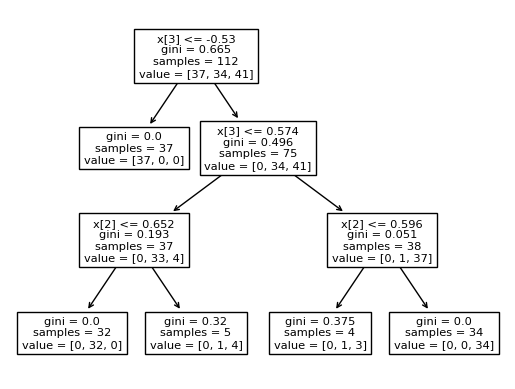

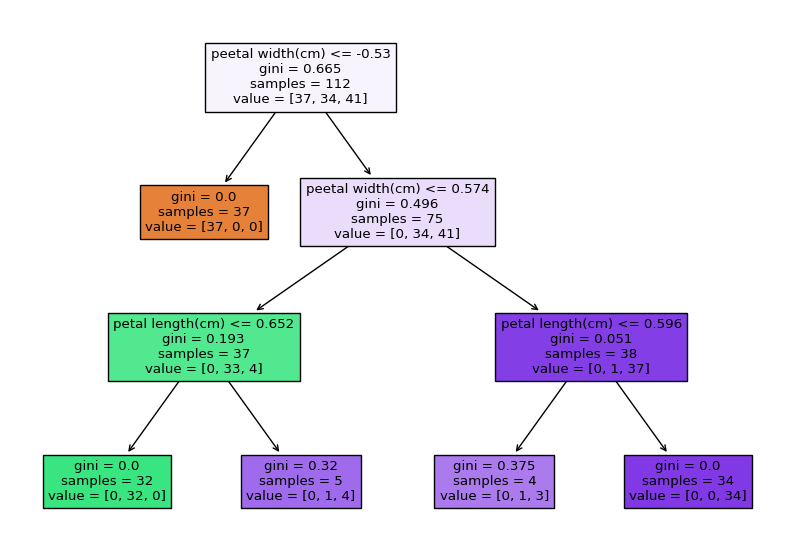


예측값
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0]
정답
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0]
train data에 대한 정확도 = 0.9821428571428571


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris_data = load_iris()
print("data_key : {}".format(iris_data.keys())) #load한 data들의 key 확인
print("feature종류(=train의 feature순서)\n = {}".format(iris_data['feature_names']))
train_input, test_input, train_target, test_target = train_test_split(iris_data['data'] ,iris_data['target'], random_state=1) #test_set과 train_set 생성
data_mean = np.mean(train_input, axis = 0)
data_std = np.std(train_input, axis =0)
train_scaled = (train_input - data_mean)/data_std #표준점수 계산
test_scaled = (test_input - data_mean)/data_std

dt = DecisionTreeClassifier(max_depth=3,random_state=1)    #decisiontreeclassifier생성
dt.fit(train_scaled,train_target)
plot_tree(dt)
plt.show()

plt.figure(figsize=(10,7))#그래프사이즈 조정
plot_tree(dt, filled=True, feature_names=['sepal length(cm)','sepal width(cm)','petal length(cm)','peetal width(cm)']) #filled -> 클래스에 맞게 노드의 색깔지정
plt.show()
test_pred = dt.predict(test_scaled)
print("\n예측값")
print(test_pred)
print("정답")
print(test_target)
print("train data에 대한 정확도 = {}".format(dt.score(train_scaled,train_target)))


##K-nearest neighbor

data_key : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
feature종류(=train의 feature순서)
 = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
각 feature의 평균 = [5.83888889 3.09777778 3.65111111 1.15444444]
각 feature의 표준편차 = [0.88489729 0.42504321 1.85898685 0.79849318]
예측값
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 1 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 1 1 2 1 2]
정답
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2]
테스트 정확도 :0.92
score : 0.9166666666666666
예측샘플 feature = [[5.  2.9 1.  0.2]]
예측값 = [2]
예측한 품종 = ['virginica']


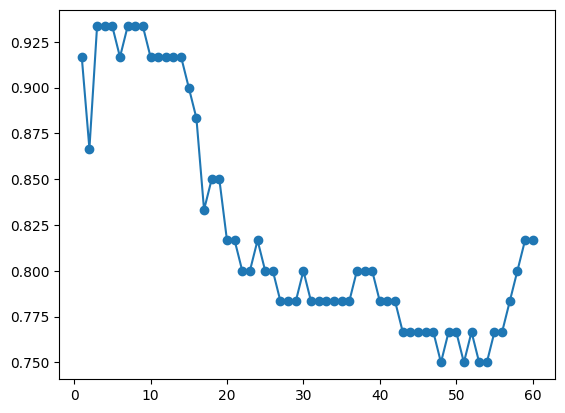

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt


iris_data = load_iris()
print("data_key : {}".format(iris_data.keys())) #load한 data들의 key 확인
train_input, test_input, train_target, test_target = train_test_split(iris_data['data'] ,iris_data['target'],test_size=0.4, random_state=0) #test_set과 train_set 생성
print("feature종류(=train의 feature순서)\n = {}".format(iris_data['feature_names']))
data_mean = np.mean(train_input, axis = 0)
data_std = np.std(train_input, axis =0)

print("각 feature의 평균 = {}".format(data_mean))
print("각 feature의 표준편차 = {}".format(data_std))
train_scaled = (train_input - data_mean)/data_std #표준점수 계산
kn = KNeighborsClassifier(n_neighbors=6) #k-최근점 이웃 모델 알고리즘 load
kn.fit(train_scaled, train_target) #표준점수를 통해 train
test_scaled = (test_input - data_mean)/data_std
test_pred = kn.predict(test_scaled)
print("예측값")
print(test_pred)
print("정답")
print(test_target)
print("테스트 정확도 :{:.2f}".format(np.mean(test_pred== test_target)))
print("score : {}".format(kn.score(test_scaled,test_target))) #.score()->훈련이 잘되어있는지 check

new_input = np.array([[5, 2.9, 1, 0.2]]) #새로운 saple을 어떻게 판단할지 check
new_predict = kn.predict(new_input)

print("예측샘플 feature = {}".format(new_input))
print("예측값 = {}".format(new_predict))
print("예측한 품종 = {}".format(iris_data['target_names'][new_predict]))

K = [i+1 for i in range(len(test_target))]
test_score_nn = []
for k in K:
 kn_nn =KNeighborsClassifier(n_neighbors = k)
 kn_nn.fit(train_scaled, train_target)
 test_score_nn.append(accuracy_score(test_target, kn_nn.predict(test_scaled)))


plt.plot(K,test_score_nn,marker="o")
plt.show()



##Gradient boosting decision tree

예측값
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
정답
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
테스트 정확도 :0.97
score : 0.9736842105263158
검증점수 : [about train, about test]  [1.0, 0.9640316205533598]

max depth = 1


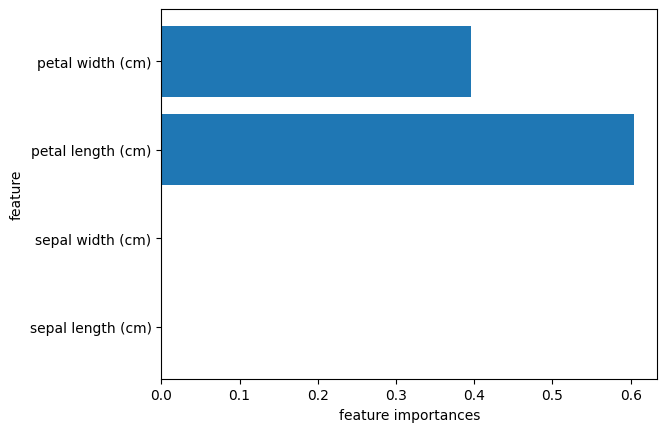


max depth = 2


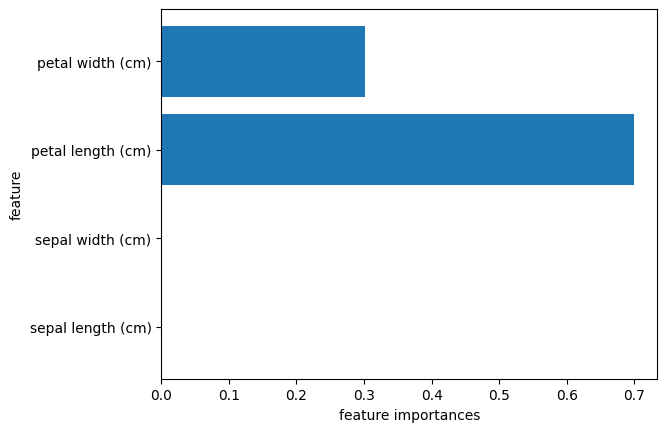


max depth = 3


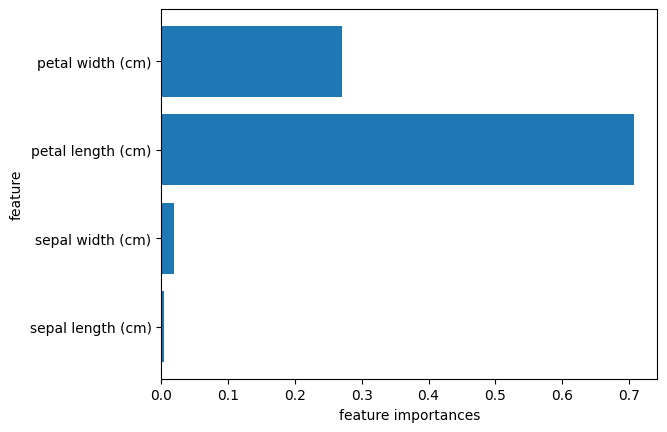


max depth = 4


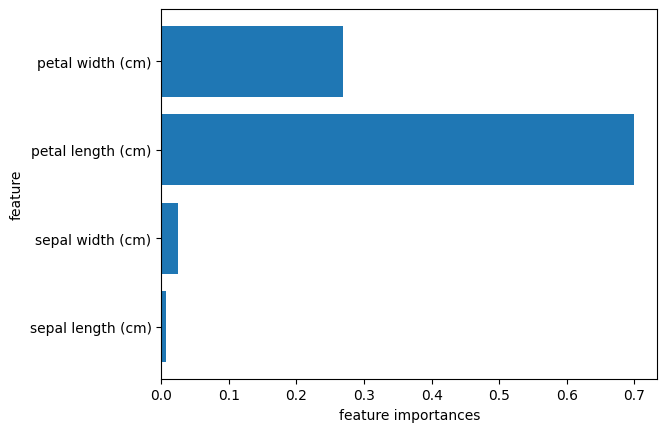


max depth = 5


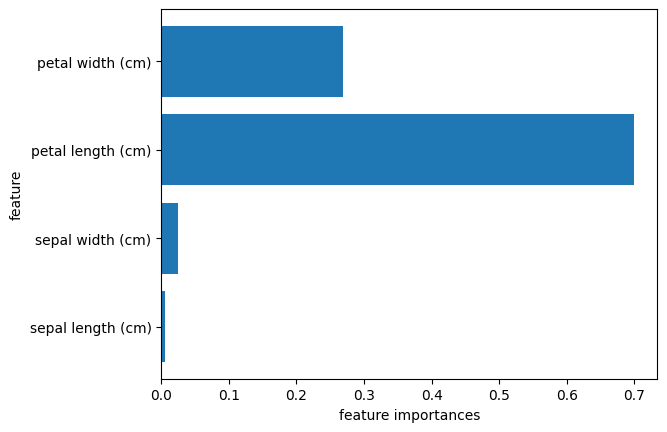

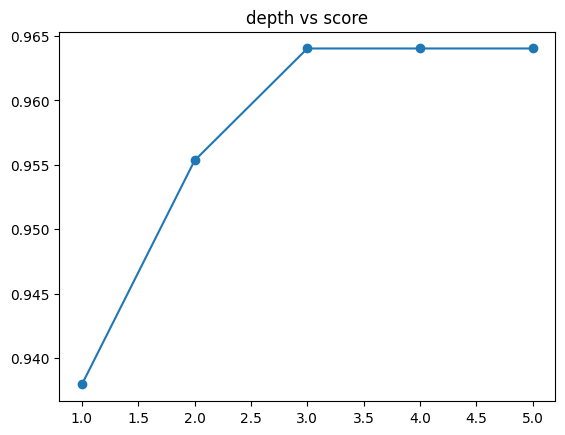

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt

iris_data = load_iris()
train_input, test_input, train_target, test_target = train_test_split(iris_data['data'] ,iris_data['target'], random_state=0) #test_set과 train_set 생성
data_mean = np.mean(train_input, axis = 0)
data_std = np.std(train_input, axis =0)
train_scaled = (train_input - data_mean)/data_std #표준점수 계산

gb = GradientBoostingClassifier(random_state=42, learning_rate = 0.01, max_depth=5,n_estimators=100)
gb.fit(train_scaled, train_target) #표준점수를 통해 train

# test준비
train_scaled = (train_input - data_mean)/data_std
train_pred = gb.predict(train_scaled)
test_scaled = (test_input - data_mean)/data_std
test_pred = gb.predict(test_scaled)

#test 결과
print("예측값")
print(test_pred)
print("정답")
print(test_target)
print("테스트 정확도 :{:.2f}".format(np.mean(test_pred== test_target)))
print("score : {}".format(gb.score(test_scaled,test_target))) #.score()->훈련이 잘되어있는지 check

#과대적합check
#cross_validate -> 교차 검증에 사용
#retrun_train_score = True 이면 test뿐만 아니라 train set에 대한 점수도 반환, n_jobs 병렬로 실행할 작업수 -1은 모든 process사용 의미
scores = cross_validate(gb, train_scaled, train_target, return_train_score = True, n_jobs=-1) # group => test와 train으로 분리할 group 의미 -> 기존의 train_scaled, train_target 에서 다시 test,train을 분류해서 검증점수check
print("검증점수 : [about train, about test] ",[np.mean(scores['train_score']),np.mean(scores['test_score'])])    # 각 feature에 대한 검증점수 평균내서 확인



n_feature = iris_data.data.shape[1]
feature=np.arange(n_feature)

depth = [1,2,3,4,5]
test_score_depth = []
test_score_gb = []
for i in depth:
 gb_depth = GradientBoostingClassifier(random_state=42, learning_rate = 0.01, max_depth=i,n_estimators=100)
 gb_depth.fit(train_scaled, train_target)
 test_score_gb.append(accuracy_score(test_target, gb_depth.predict(test_scaled)))
 print("\nmax depth = {}".format(i))
 plt.barh(feature, gb_depth.feature_importances_, align='center') #수평 막대 형태로 plot
 plt.yticks(feature, iris_data.feature_names) #y축 레이블 표시
 plt.xlabel('feature importances')
 plt.ylabel('feature')
 plt.show()
 scores = cross_validate(gb_depth, train_scaled, train_target, return_train_score = True, n_jobs=-1) # group => test와 train으로 분리할 group 의미 -> 기존의 train_scaled, train_target 에서 다시 test,train을 분류해서 검증점수check
 test_score_depth.append(np.mean(scores['test_score']))

plt.title("depth vs score")
plt.plot(depth,test_score_depth,marker="o")
plt.show()



##XGB

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


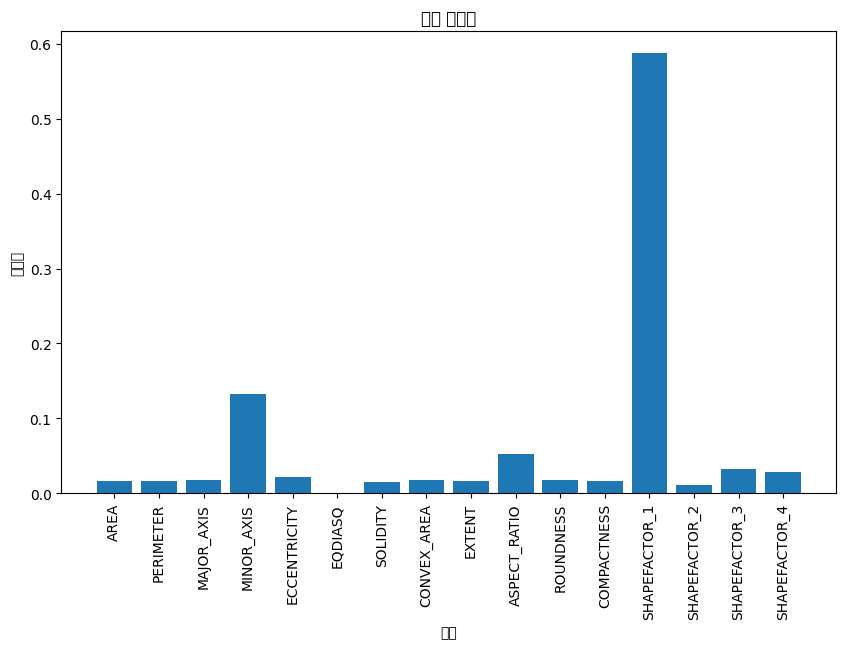

'\npip install graphviz #xgb방법에서 트리를 시각화 화기 위해서는 graphviz라는 파일을 따로 설치해야 된다.\nxgb.plot_tree(xgb, num_trees=0)  # num_trees는 시각화하려는 트리의 인덱스입니다\nplt.show()\n'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from xgboost import XGBClassifier  # XG부스트를 사용하기 위해 라이브러리에서 불러오기
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree #트리를 그리기 위한 라이브러리
# 구글 드라이브에 있는 파일을 불러오기 위해 경로 지정
excel_file_path = '/content/drive/MyDrive/ML-midterm/Q2.xls'

# 엑셀 파일 불러오기
data_2 = pd.read_excel(excel_file_path, header=0)

# feature와 output 분리
feature_2 = data_2.iloc[:, :-1]
output_2 = data_2.iloc[:, -1]

# 훈련 데이터와 테스트 데이터 분리
train_input_2, test_input_2, train_target_2, test_target_2 = train_test_split(feature_2, output_2, random_state=1, test_size=0.2)

# 데이터 전처리
data_mean = np.mean(train_input_2, axis=0)
data_std = np.std(train_input_2, axis=0)
train_scaled_2 = (train_input_2 - data_mean) / data_std
test_scaled_2 = (test_input_2 - data_mean) / data_std


xgb = XGBClassifier(n_estimators=100, max_depth=4, random_state=1,learning_rate=0.1)  # XGBoost 모델 생성 학습률은 0.1,최대 깊이는 4, 트리는 100개 생성

class_mapping = {'Kirmizi_Pistachio': 0, 'Siit_Pistachio': 1} #xgb에서는 타켓 예측을 숫자로 하기 때문에 기존의 str형 타겟에서 숫자로 매핑을 시켜줘야 한다.
test_target_mapping = test_target.map(class_mapping)
train_target_mapping = train_target_2.map(class_mapping)

xgb.fit(train_scaled_2, train_target_mapping)


important_tree_index = xgb.feature_importances_.argmax()  #랜덤 포레스트에서 만든 트리중 특성중요도를 계산하고 argmax를 통해 그중 가장 컸던 트리의 index를 추출




# 특성 중요도 얻기
feature_importance = xgb.feature_importances_   #sklearn의 결정트리 모델에서 제공하는 feature_importances_를 통해 특성 중요도를 알 수 있다. 위에서 정의한 dt를 통해 특성 중요도 계산

# 중요도를 시각화
plt.figure(figsize=(10, 6)) #그래프 사이즈 설정
plt.bar(range(len(feature_importance)), feature_importance)  #feature importance만큼의 막대가 필요하므로 range(len(feature_imporete)를 통해 특성중요도의 개수만큼의 영역을 만든다
plt.xticks(range(len(feature_importance)), data_2.columns[:-1], rotation=90)    #pandas로 data를 처리할때 특성이름 부분을 header로 처리해 잘랐으므로 원래 데이터에서 .colums를 통해 colum부분의 특성 이름 부분만 추출한다 맨 마지막은 output이므로 제외
plt.xlabel("특성")
plt.ylabel("중요도")
plt.title("특성 중요도")
plt.show()


